In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

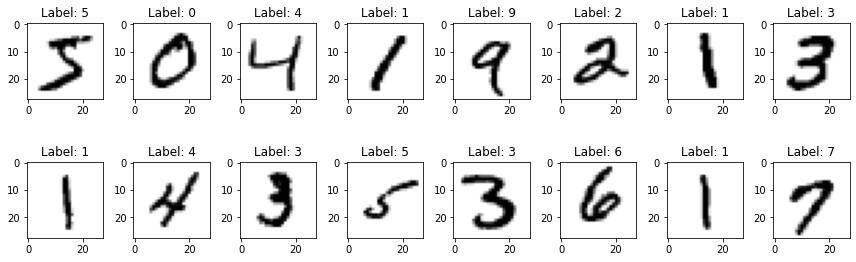

In [ ]:
%matplotlib inline
num_row = 2
num_col = 8
num= num_row*num_col
images = train_images[0:num]
labels = train_labels[0:num]
# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
  ax = axes[i//num_col, i%num_col]
  ax.imshow(images[i], cmap='gray_r')
  ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

BEFORE:



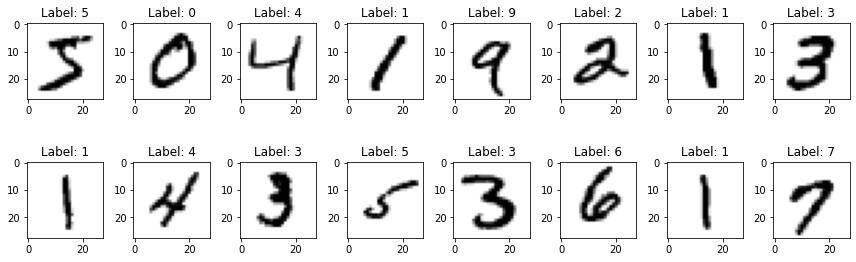

AFTER:



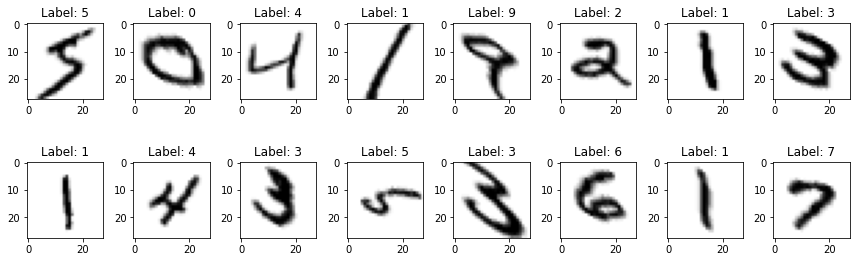

In [ ]:
shear_range_val=45

from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(shear_range=shear_range_val)
datagen.fit(train_images.reshape(train_images.shape[0], 28, 28, 1))

num_row = 2
num_col = 8
num= num_row*num_col
# plot before
print('BEFORE:\n')
fig1, axes1 = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
     ax = axes1[i//num_col, i%num_col]
     ax.imshow(train_images[i], cmap='gray_r')
     ax.set_title('Label: {}'.format(train_labels[i]))
plt.tight_layout()
plt.show()
# plot after
print('AFTER:\n')
fig2, axes2 = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for X, Y in datagen.flow(train_images.reshape(train_images.shape[0], 28, 28, 1),train_labels.reshape(train_labels.shape[0], 1),batch_size=num,shuffle=False):
     for i in range(0, num):
          ax = axes2[i//num_col, i%num_col]
          ax.imshow(X[i].reshape(28,28), cmap='gray_r')
          ax.set_title('Label: {}'.format(int(Y[i])))
     break
plt.tight_layout()
plt.show()

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3) ,activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=12, 
                    validation_data=(test_images, test_labels))

Epoch 1/12
1875/1875 [==============================] - 89s 32ms/step - loss: 0.0124 - accuracy: 0.9960 - val_loss: 0.0286 - val_accuracy: 0.9919
Epoch 2/12
1875/1875 [==============================] - 61s 33ms/step - loss: 0.0109 - accuracy: 0.9965 - val_loss: 0.0364 - val_accuracy: 0.9895
Epoch 3/12
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0078 - accuracy: 0.9975 - val_loss: 0.0351 - val_accuracy: 0.9917
Epoch 4/12
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0075 - accuracy: 0.9975 - val_loss: 0.0363 - val_accuracy: 0.9911
Epoch 5/12
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0071 - accuracy: 0.9977 - val_loss: 0.0509 - val_accuracy: 0.9879
Epoch 6/12
1875/1875 [==============================] - 59s 32ms/step - loss: 0.0076 - accuracy: 0.9978 - val_loss: 0.0424 - val_accuracy: 0.9901
Epoch 7/12
1875/1875 [==============================] - 59s 32ms/step - loss: 0.0065 - accuracy: 0.9978 - val_loss: 0.0494 -

313/313 - 3s - loss: 0.0430 - accuracy: 0.9924 - 3s/epoch - 9ms/step


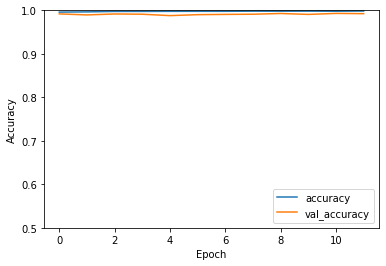

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)